In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import sys
# Add a new path with needed .py files.
sys.path.insert(0, 'C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\MedianFilter\Python') 

import functions
import gitInformation

In [2]:
%matplotlib inline

In [3]:
gitInformation.printInformation()

Information about this notebook
Date: 2015-11-18
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\.git
Current git SHA: bba856dfde6bed55efb40e4150ea12ce424c66d5
Remotes: fork, origin, 
Current branch: master
fork remote URL: http://github.com/dowa4213/kt-2015-DSPHandsOn.git
origin remote URL: https://github.com/ktakagaki/kt-2015-DSPHandsOn.git


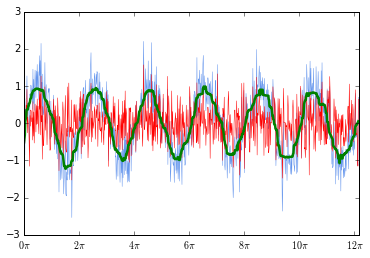

In [4]:
functions.medianSinPlotNoised(16,33,16*129,640,-640)
plt.savefig('Medianfilter SN = 2.png', dpi = 300)

In [4]:
# Sine wave, 16 wave numbers, 16*128 samples.  
x = np.linspace(0, 2, 16*128)
data = np.sin(16*np.pi*x)
# Different noises with different standard deviations (spread or "width")
# will be saved in, so we can generate different signal to noise ratios
diff_noise = np.zeros((140,len(data)))
# Noised sine waves. 
noised_sines = np.zeros((140,len(data)))
# Median filtered wave.
medfilter = np.zeros((140,len(data)))
# Filtered sine waves (noised_sines - medfilter)
filtered_sines = np.zeros((140,len(data)))
# Behavior of the median filter. Save the max values of the filtered waves in it.
behav = np.zeros(140)
# Lists with used window lengths and Signal to noise ratios
wl = [17,33,65,97, 129, 161, 193, 225, 257, 289, 321, 353, 385, 417, 449]
sn = [1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
# Calculate and save all values.
# Because the for loop doesn't count from 1 to 10 for example,
# we need a counter to iterate through the array.
# The counter is assigne to -1, so we can iterate from 0 to len(values)
count = -1
count2 = -1
values = np.zeros((len(sn), len(wl)))
for w in  wl[:11]:
    count = count + 1
    for x in sn:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            # Create different noises, with x we change the signal to noise
            # ratio from 10 to 1.
            diff_noise[i, :] = np.random.normal(0, 0.706341266/np.sqrt(x), len(data))
            # Add noise to each sine wave, to create a realisitc signal.
            noised_sines[i, :] = data + diff_noise[i, :]
            # Filter the all noised sine waves.
            medfilter[i, :] = medfilt(noised_sines[i, :], w)
            # Subtract the filtered wave from the noised sine waves.
            filtered_sines[i, :] = noised_sines[i, :] - medfilter[i, :]
            # Calculate the root mean square (RMS) of each sine wave
            behav[i] = np.sqrt(np.mean(np.square(filtered_sines[i, :])))
        # Calculate the mean of the bahvior, so we can see how
        # the signal to noise ratio effects the median filter
        # with different window lengths.
        mean = np.mean(behav)
        # Save the result in the 'values' array
        values[count2:count2+1:,count] = mean
    # Set coun2 back to -1, so we can iterate again from 0 to len(values).
    # Otherwise the counter would get higher and is out of range.
    count2 = - 1 
# Save the array, because the calculation take some time.
# Load the array with "values = np.loadtxt('values.txt')".
np.savetxt("values.txt", values)

In [7]:
values = np.loadtxt("values.txt")

In [10]:
viridis_data = np.loadtxt('viridis_data.txt')
plasma_data = np.loadtxt('plasma_data.txt')
# viris_data and plasma_data taken from
# https://github.com/BIDS/colormap/blob/master/colormaps.py

### Figure 1: Plot of the behavior of the median filter with given window length and different S/N ratio

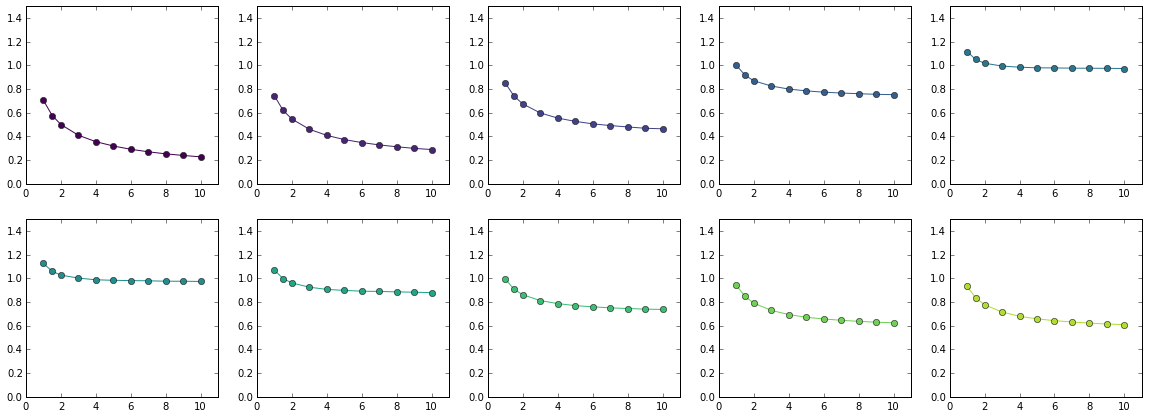

In [22]:
fig = plt.figure(figsize=(20, 7))
for p in range(0,11):
    ax = plt.subplot(2, 5,  p)
    plt.axis([0, 11, 0, 1.5])
    plt.plot(sn,values[::,p], 'o-', color=viridis_data[(p*25)-25,:])
plt.savefig('Behavior with given SN ratio and different wl.png',dpi=300)

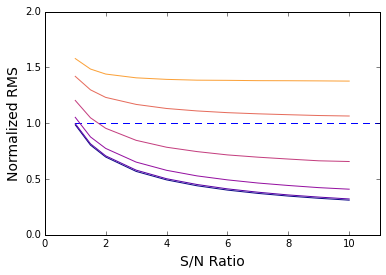

In [10]:
fig = plt.figure()
values3 = np.zeros((len(sn),len(wl)))
for p in range(6):
    ax = plt.subplot()
    values3[::,p] = values[::,p]/0.7069341
    plt.axis([0, 11, 0, 2])
    plt.ylabel('Normalized RMS', size = 14)
    plt.xlabel('S/N Ratio', size = 14)
    plt.hlines(1,1,101, color = 'b', linestyle = '--')
    plt.plot(sn,values3[::,p], color=plasma_data[(p*40),:])
        
plt.savefig('Behavior with given SN ratio and different wl3.png',dpi=300)

### Figure 2: Plot of the behavior of the median filter with given window length and different S/N ratio

In [11]:
values = np.zeros((len(wl), len(sn)))
count = -1
count2 = -1
for x in sn:
    count = count + 1
    for w in wl:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, 0.706341266/np.sqrt(x), len(data))
            noised_sines[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_sines[i, :], w)
            filtered_sines[i, :] = noised_sines[i, :] - medfilter[i, :]
            behav[i] = np.sqrt(np.mean(np.square(filtered_sines[i, :])))
        mean = np.mean(behav)   
        values[count2:count2+1:,-count] = mean
    count2 = -1
np.savetxt("values2.txt", values)

In [12]:
values2 = np.loadtxt("values2.txt")

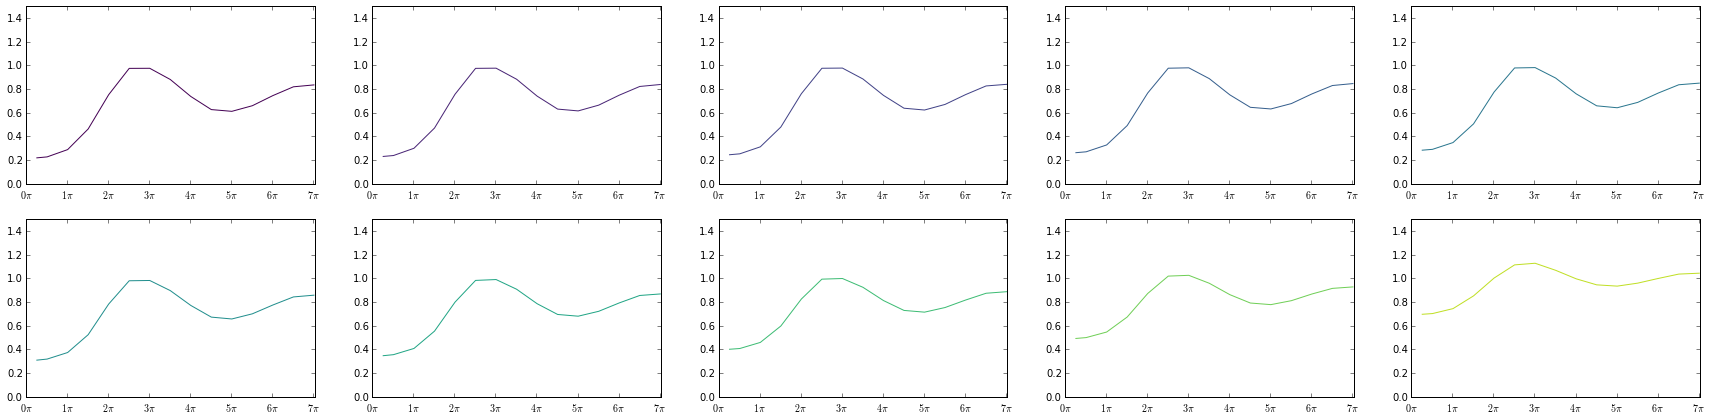

In [13]:
fig = plt.figure(figsize=(30,7))
for p in range(10):
    ax = plt.subplot(2,5,p)
    plt.axis([0, 450, 0, 1.5])
    xticks = np.arange(0, max(wl), 64)
    ax.set_xticks(xticks)
    x_label = [r"${%s\pi}$" % (v) for v in range(len(xticks))]
    ax.set_xticklabels(x_label)
    plt.plot(wl,values2[::,p], color=viridis_data[(p*25)-25,:])
plt.savefig('Behavior with given wl and different SN ratio.png',dpi=300)

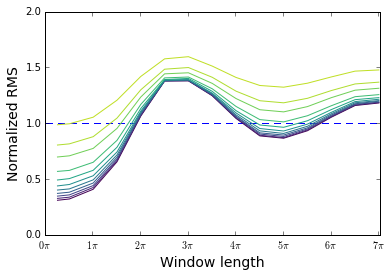

In [14]:
fig = plt.figure()
values4 = np.zeros((len(wl), len(sn)))
for i in range (11):
    # Normalize the RMS with the RMS of a normal sine wave
    values4[::,i] = values2[::,i]/0.7069341
    ax = plt.subplot()
    plt.axis([0, 450, 0, 2])
    # Set xticks at each 64th point
    xticks = np.arange(0, max(wl) + 1, 64)
    ax.set_xticks(xticks)
    # x_labe = pi at each 64th point
    x_label = [r"${%s\pi}$" % (v) for v in range(len(xticks))]
    ax.set_xticklabels(x_label)
    plt.ylabel('Normalized RMS', size = 14)
    plt.xlabel('Window length', size = 14)
    plt.plot(wl,values4[::,i], color=viridis_data[(i*25)-25,:])
    plt.hlines(1,1,max(wl), color = 'b', linestyle = '--')
plt.savefig('Behavior with given wl and different SN ratio2.png',dpi=300)

In [7]:
# Alternative
values = np.zeros((len(wl), len(sn)))
count = -1
count2 = -1
for x in sn:
    count = count + 1
    for w in wl:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, 0.706341266/np.sqrt(x), len(data))
            noised_sines[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_sines[i, :], w)
            filtered_sines[i, :] = data - medfilter[i, :]
            behav[i] = np.sqrt(np.mean(np.square(filtered_sines[i, :])))
        mean = np.mean(behav)   
        values[count2:count2+1:,-count] = mean
    count2 = -1
np.savetxt("values2A.txt", values)

In [8]:
values2A = np.loadtxt("values2A.txt")

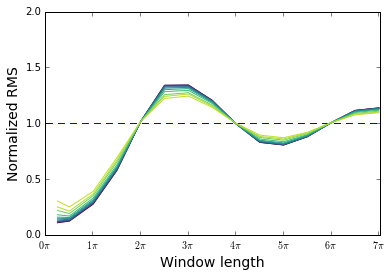

In [11]:
fig = plt.figure()
values4 = np.zeros((len(wl), len(sn)))
for i in range (11):
    # Normalize the RMS with the RMS of a normal sine wave
    values4[::,i] = values2A[::,i]/0.7069341
    ax = plt.subplot()
    plt.axis([0, 450, 0, 2])
    # Set xticks at each 64th point
    xticks = np.arange(0, max(wl) + 1, 64)
    ax.set_xticks(xticks)
    # x_labe = pi at each 64th point
    x_label = [r"${%s\pi}$" % (v) for v in range(len(xticks))]
    ax.set_xticklabels(x_label)
    plt.ylabel('Normalized RMS', size = 14)
    plt.xlabel('Window length', size = 14)
    plt.plot(wl,values4[::,i], color=viridis_data[(i*25)-25,:])
    plt.hlines(1,1,max(wl), color = 'b', linestyle = '--')
plt.savefig('Behavior with given wl and different SN ratio2A.png',dpi=300)

In [12]:
# Alternative we subtract the filtered wave from the original sine wave,
# not from the noised sine wave
count = -1
count2 = -1
values = np.zeros((len(sn), len(wl)))
for w in  wl[:11]:
    count = count + 1
    for x in sn:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, 0.706341266/np.sqrt(x), len(data))
            noised_sines[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_sines[i, :], w)
            filtered_sines[i, :] = data - medfilter[i, :]
            behav[i] = np.sqrt(np.mean(np.square(filtered_sines[i, :])))
        mean = np.mean(behav)
        values[count2:count2+1:,count] = mean
    count2 = - 1 
np.savetxt("valuesA.txt", values)

In [13]:
valuesA = np.loadtxt("valuesA.txt")

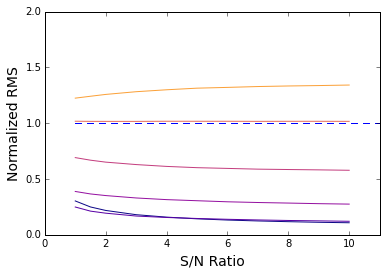

In [14]:
fig = plt.figure()
values3 = np.zeros((len(sn),len(wl)))
for p in range(6):
    ax = plt.subplot()
    values3[::,p] = valuesA[::,p]/0.7069341
    plt.axis([0, 11, 0, 2])
    plt.ylabel('Normalized RMS', size = 14)
    plt.xlabel('S/N Ratio', size = 14)
    plt.hlines(1,1,101, color = 'b', linestyle = '--')
    plt.plot(sn,values3[::,p], color=plasma_data[(p*40),:])
        
plt.savefig('Behavior with given SN ratio and different wl3A.png',dpi=300)